##### K means cluster

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [122]:
df = pd.read_csv('./income.csv')
df.head(2)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000


In [123]:
df.drop('Name',axis='columns',inplace=True)
df.head(2)

,Age,Income($)
0,27,70000
1,29,90000


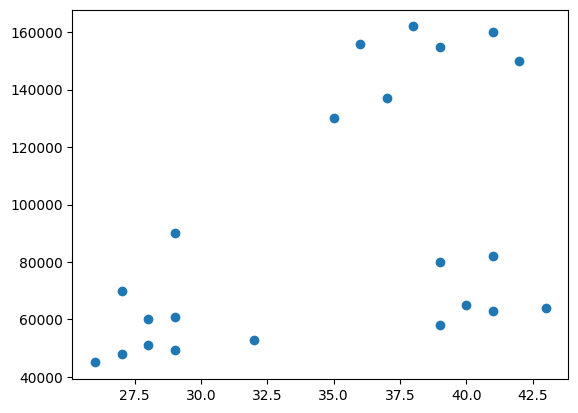

In [124]:
plt.scatter(df.Age,df['Income($)'])

We can se that we can form 3 clusters

In [125]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 'warn',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [126]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

c:\Users\arghya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [127]:
df['cluster'] = y_predicted
df.head(3)

,Age,Income($),cluster
0,27,70000,2
1,29,90000,2
2,29,61000,1


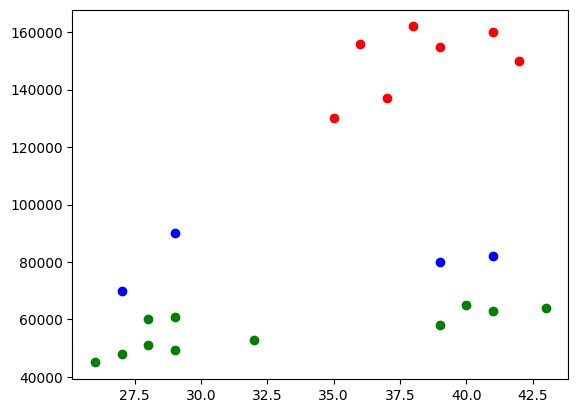

In [128]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

plt.scatter(df0.Age,df0['Income($)'], color='red')
plt.scatter(df1.Age,df1['Income($)'], color='green')
plt.scatter(df2.Age,df2['Income($)'], color='blue')

In [129]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [130]:
scaler.fit(df[['Income($)']])

MinMaxScaler()

In [131]:
df['Income($)'] = scaler.transform(df[['Income($)']])
df.head(4)

,Age,Income($),cluster
0,27,0.213675,2
1,29,0.384615,2
2,29,0.136752,1
3,28,0.128205,1


In [132]:
scaler.fit(df[['Age']])
df.Age = scaler.transform(df[['Age']])
df.head(4)

,Age,Income($),cluster
0,0.058824,0.213675,2
1,0.176471,0.384615,2
2,0.176471,0.136752,1
3,0.117647,0.128205,1


Now that all params are scalled we can run K means cluster

In [133]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

c:\Users\arghya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

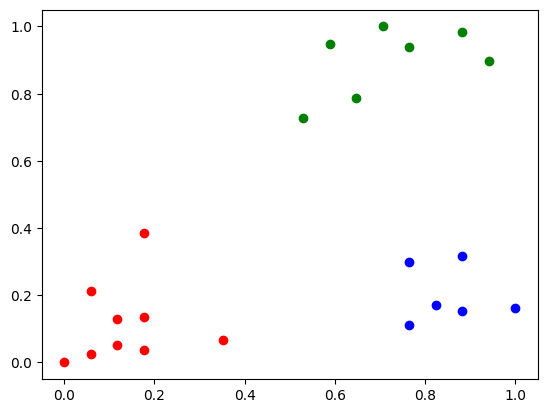

In [134]:
df['cluster'] = y_predicted

df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

plt.scatter(df0.Age,df0['Income($)'], color='red')
plt.scatter(df1.Age,df1['Income($)'], color='green')
plt.scatter(df2.Age,df2['Income($)'], color='blue')

##### All the clusters have a centroid, we can plot those centroids too 

In [137]:
centers = km.cluster_centers_
centers

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

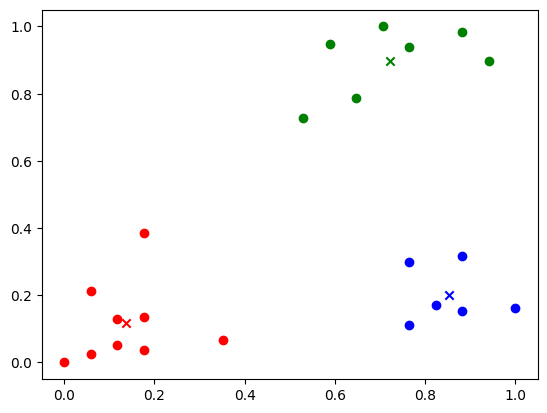

In [140]:
plt.scatter(df0.Age,df0['Income($)'], color='red')
plt.scatter(df1.Age,df1['Income($)'], color='green')
plt.scatter(df2.Age,df2['Income($)'], color='blue')

plt.scatter(centers[0][0],centers[0][1], color='red', marker='x')
plt.scatter(centers[1][0],centers[1][1], color='green', marker='x')
plt.scatter(centers[2][0],centers[2][1], color='blue', marker='x')

Now we will plot the elbow plot and find out which is the best number of clusters to form

In [141]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

c:\Users\arghya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\arghya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\arghya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\arghya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\clus

In [142]:
sse

[20.024920602897268,
 5.321905619468307,
 0.4750783498553096,
 0.34910470944195654,
 0.26640301246684156,
 0.21055478995472496,
 0.1685851223602976,
 0.13265419827245162,
 0.10497488680620909]

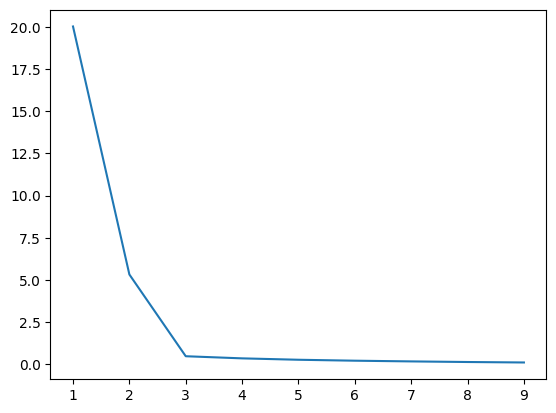

In [143]:
plt.plot(k_rng,sse)